<a href="https://colab.research.google.com/github/Vinay3022272/Automated-Data-Inconsistency-Detection-Tool/blob/main/Flight_Price_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
1+1

2

### This is crazy
hello world kaise ho, ksa kai ,kemcho

In [1]:
!pip install pandas

In [132]:
!pip install numpy

In [3]:
!pip install matplotlib

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install openpyxl

In [8]:
df = pd.read_excel("flight_price.xlsx")
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
df_copy = df.copy()

In [11]:
df_copy.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
df_copy["data_of_jor"]=pd.to_datetime(df_copy["Date_of_Journey"])
df_copy["day"] = df_copy["data_of_jor"].dt.day
df_copy["month"] = df_copy["data_of_jor"].dt.month
df_copy["year"] = df_copy["data_of_jor"].dt.year
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  object        
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  data_of_jor      10683 non-null  datetime64[ns]
 12  day              10683 non-null  int32         
 13  month            10683 non-null  int32         
 14  year             10683 non-null  int32

/tmp/ipython-input-2102456971.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_copy["data_of_jor"]=pd.to_datetime(df_copy["Date_of_Journey"])


In [17]:
# df_copy.drop("data_of_jor",axis=1, inplace=True)
# df_copy.drop(columns=["Date_of_Journey","data_of_jor"],axis=1, inplace=True)
df_copy.info()
df_copy.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  day              10683 non-null  int32 
 11  month            10683 non-null  int32 
 12  year             10683 non-null  int32 
 13  Dep_Hour         10683 non-null  object
 14  Dep_Min          10683 non-null  object
dtypes: int32(3), int64(1), object(11)
memory usage: 1.1+ MB


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,05


In [18]:
df_copy["Dep_Hour"]=df_copy["Dep_Time"].str.split(":").str[0]
df_copy["Dep_Min"]=df_copy["Dep_Time"].str.split(":").str[0]
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  day              10683 non-null  int32 
 11  month            10683 non-null  int32 
 12  year             10683 non-null  int32 
 13  Dep_Hour         10683 non-null  object
 14  Dep_Min          10683 non-null  object
dtypes: int32(3), int64(1), object(11)
memory usage: 1.1+ MB


In [16]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [19]:
df_copy["Dep_Hour"]=df_copy["Dep_Hour"].astype(int)
df_copy["Dep_Min"]=df_copy["Dep_Min"].astype(int)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  day              10683 non-null  int32 
 11  month            10683 non-null  int32 
 12  year             10683 non-null  int32 
 13  Dep_Hour         10683 non-null  int64 
 14  Dep_Min          10683 non-null  int64 
dtypes: int32(3), int64(3), object(9)
memory usage: 1.1+ MB


In [20]:
df_copy.drop("Dep_Time",axis=1,inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   day              10683 non-null  int32 
 10  month            10683 non-null  int32 
 11  year             10683 non-null  int32 
 12  Dep_Hour         10683 non-null  int64 
 13  Dep_Min          10683 non-null  int64 
dtypes: int32(3), int64(3), object(8)
memory usage: 1.0+ MB


In [21]:
df_copy.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,5


In [22]:
df_copy["Arrival_Time"]=df_copy["Arrival_Time"].str.split(" ").str[0]
df_copy["Arrival_Time"]

,Arrival_Time
0,01:10
1,13:15
2,04:25
3,23:30
4,21:35
...,...
10678,22:25
10679,23:20
10680,11:20
10681,14:10


In [26]:
df_copy["Arrival_Hour"]=df_copy["Arrival_Time"].str.split(":").str[0]
df_copy["Arrival_Min"]=df_copy["Arrival_Time"].str.split(":").str[1]
df_copy["Arrival_Min"]
# df_copy["Arrival_Hour"]
# df_copy.info()
# df_copy.head(3)

,Arrival_Min
0,10
1,15
2,25
3,30
4,35
...,...
10678,25
10679,20
10680,20
10681,10


In [27]:
df_copy["Arrival_Hour"]=df_copy["Arrival_Hour"].astype(int)
df_copy["Arrival_Min"]=df_copy["Arrival_Min"].astype(int)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   day              10683 non-null  int32 
 10  month            10683 non-null  int32 
 11  year             10683 non-null  int32 
 12  Dep_Hour         10683 non-null  int64 
 13  Dep_Min          10683 non-null  int64 
 14  Arrival_Hour     10683 non-null  int64 
 15  Arrival_Min      10683 non-null  int64 
dtypes: int32(3), int64(5), object(8)
memory usage: 1.2+ MB


In [34]:
df_copy.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,22,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,5,13,15


In [30]:
df_copy.info()
df_copy.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   day              10683 non-null  int32 
 10  month            10683 non-null  int32 
 11  year             10683 non-null  int32 
 12  Dep_Hour         10683 non-null  int64 
 13  Dep_Min          10683 non-null  int64 
 14  Arrival_Hour     10683 non-null  int64 
 15  Arrival_Min      10683 non-null  int64 
dtypes: int32(3), int64(5), object(8)
memory usage: 1.2+ MB


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,22,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,5,13,15


In [42]:
# df_copy["Duration"]=df_copy["Duration"].str.split(" ").str[0]
# df_copy["Duration"]=df["Duration"]
df_copy["Duration"].isnull().sum()

np.int64(0)

In [75]:
df_copy["Duration_Hour"]=df_copy["Duration"].str.split(" ").str[0]
df_copy["Duration‌‌_Min"]=df_copy["Duration"].str.split(" ").str[1]
df_copy["Duration_Hour"]
# df_copy["Duration‌‌_Min"]

,Duration_Hour
0,2h
1,7h
2,19h
3,5h
4,4h
...,...
10678,2h
10679,2h
10680,3h
10681,2h


In [76]:
no_h_mask=~df_copy["Duration_Hour"].str.contains("h")
df_copy.loc[no_h_mask,"Duration_Hour"] = "0"

In [77]:
row=df_copy[df_copy["Duration_Hour"]=="5m"]
row

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration‌‌_Min


In [83]:
df_copy["Duration_Hour"]=df_copy["Duration_Hour"].str.split("h").str[0].astype(int)
# df_copy["Duration_Hour"]=df_copy["Duration_Hour"].astype(int)
df_copy["Duration_Hour"]
# df_copy.info()

,Duration_Hour
0,2
1,7
2,19
3,5
4,4
...,...
10678,2
10679,2
10680,3
10681,2


In [109]:
df_copy["Duration‌‌_Min"].fillna(0)

,Duration‌‌_Min
0,50m
1,25m
2,0
3,25m
4,45m
...,...
10678,30m
10679,35m
10680,0
10681,40m


In [116]:
df_copy["Duration‌‌_Min"]=df_copy["Duration‌‌_Min"].str.replace("m","")
df_copy["Duration‌‌_Min"]=df_copy["Duration‌‌_Min"].fillna(0)
df_copy["Duration‌‌_Min"]=df_copy["Duration‌‌_Min"].astype(int)

In [117]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   day              10683 non-null  int32 
 9   month            10683 non-null  int32 
 10  year             10683 non-null  int32 
 11  Dep_Hour         10683 non-null  int64 
 12  Dep_Min          10683 non-null  int64 
 13  Arrival_Hour     10683 non-null  int64 
 14  Arrival_Min      10683 non-null  int64 
 15  Duration_Hour    10683 non-null  int64 
 16  Duration‌‌_Min   10683 non-null  int64 
dtypes: int32(3), int64(7), object(7

In [119]:
df_copy.drop("Duration",axis=1,inplace=True)

In [141]:
df_copy["Total_Stops"]=df["Total_Stops"]
df_copy["Total_Stops"]

,Total_Stops
0,non-stop
1,2 stops
2,2 stops
3,1 stop
4,1 stop
...,...
10678,non-stop
10679,non-stop
10680,non-stop
10681,non-stop


In [126]:
df_copy["Total_Stops"].unique()
# df_copy["Total_Stops"].describe()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [142]:

# 1. Map the string values to numbers
df_copy["Total_Stops"] = df_copy["Total_Stops"].map({
    "non-stop": 0,
    "1 stop": 1,    # Changed "1 stops" to "1 stop"
    "2 stops": 2,
    "3 stops": 3,
    "4 stops": 4
})

# 2. Fill missing values (NaN) with 1 (as per your logic)
df_copy["Total_Stops"] = df_copy["Total_Stops"].fillna(1)

'''
WITH REPLACE

# Define the dictionary
replace_dict = {
    "non-stop": 0,
    "1 stop": 1,    # Careful with spelling!
    "2 stops": 2,
    "3 stops": 3,
    "4 stops": 4
}

# Apply replace
df_copy["Total_Stops"] = df_copy["Total_Stops"].replace(replace_dict)

# Handle the NaN values separately if you want them to be 1
df_copy["Total_Stops"] = df_copy["Total_Stops"].fillna(1)

In [143]:
df_copy["Total_Stops"]

,Total_Stops
0,0.0
1,2.0
2,2.0
3,1.0
4,1.0
...,...
10678,0.0
10679,0.0
10680,0.0
10681,0.0


In [ ]:
sns.pairplot()

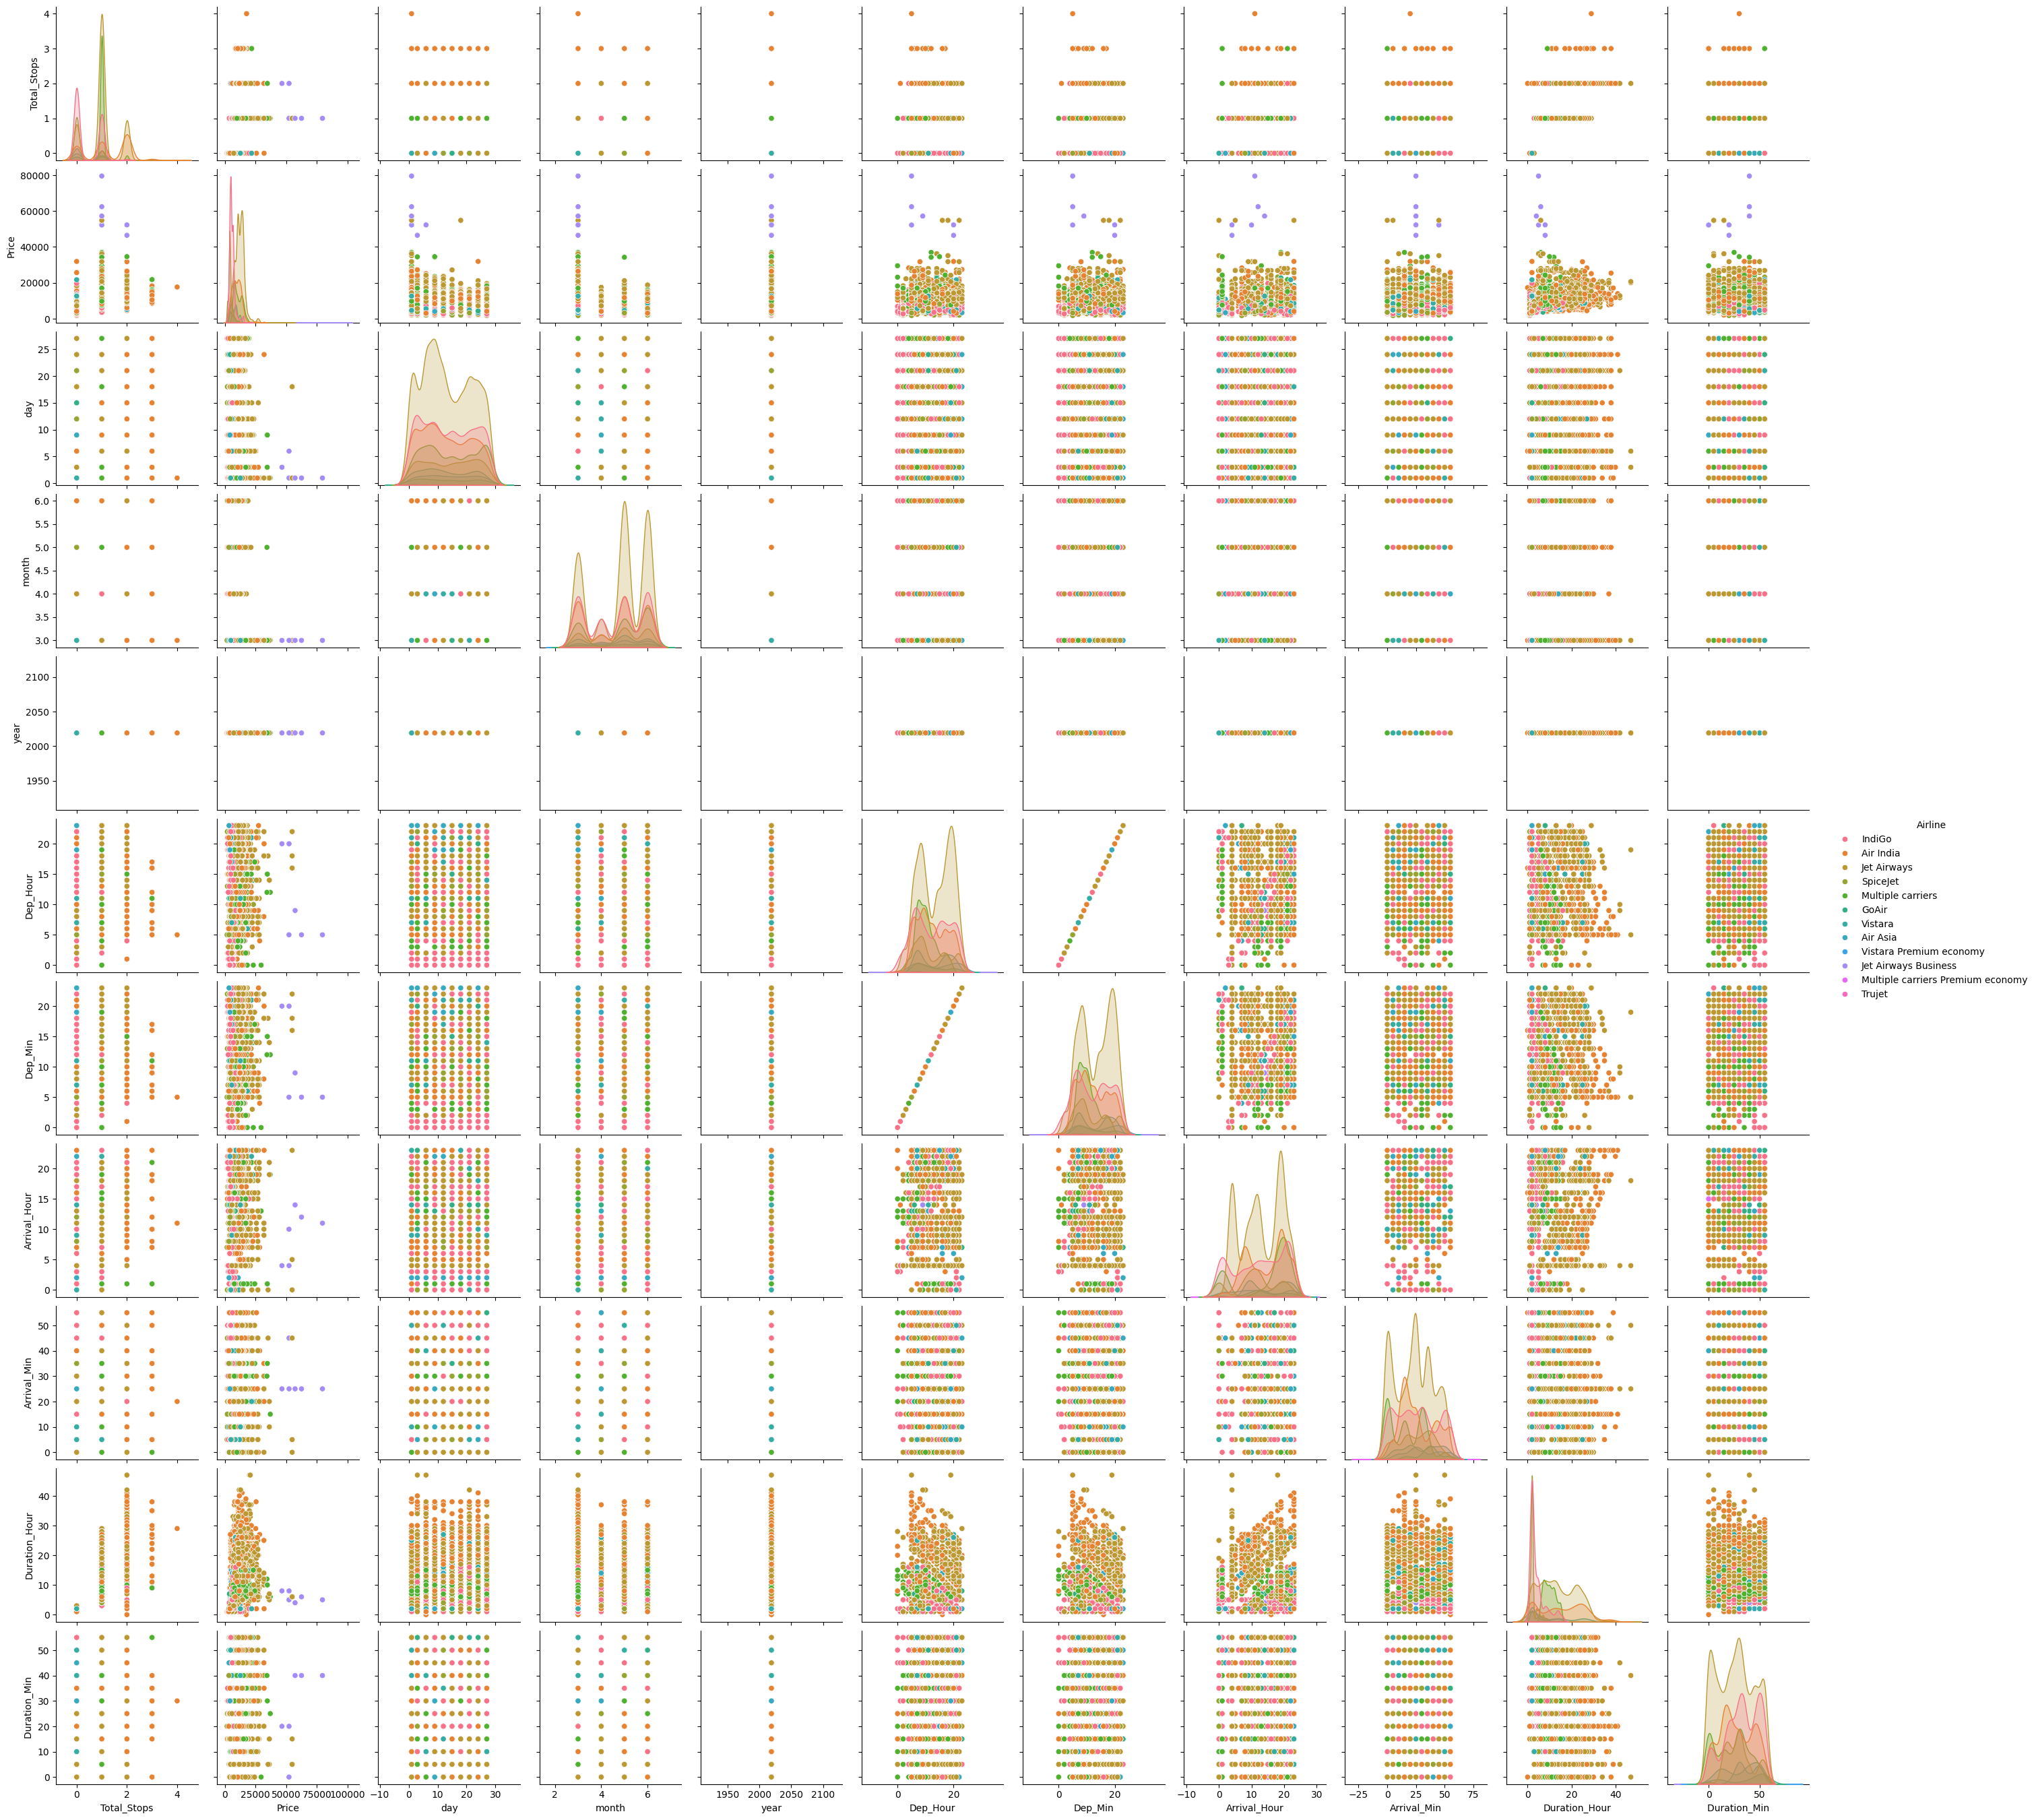

In [145]:
sns.pairplot(df_copy, hue="Airline")
plt.show()

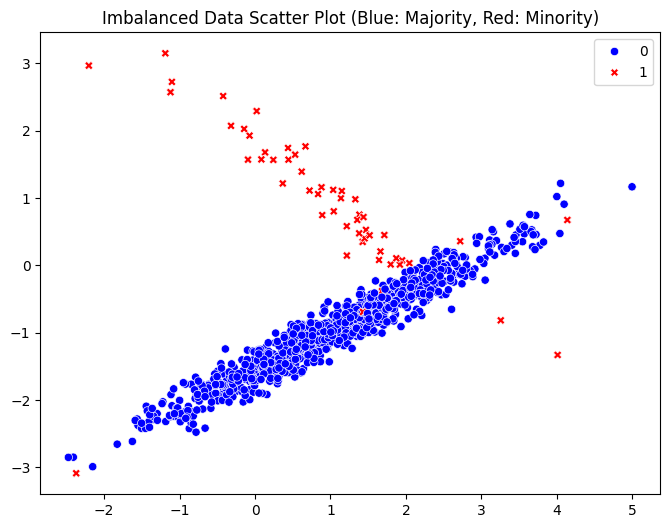

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 1. Generate Imbalanced Data (95% Class 0, 5% Class 1)
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.95], random_state=42)

# 2. Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, palette={0:'blue', 1:'red'})

plt.title('Imbalanced Data Scatter Plot (Blue: Majority, Red: Minority)')
plt.show()

In [150]:
from sklearn.preprocessing import OneHotEncoder

In [155]:
# 1. Initialize the encoder (using sparse_output=False is easier for DataFrames)
encoder = OneHotEncoder(sparse_output=False)

# 2. Fit and transform the data
alpha = encoder.fit_transform(df_copy[["Airline", "Source", "Destination"]]).toarray()

# 3. Create the DataFrame using the 'columns' keyword explicitly
encoded_df = pd.DataFrame(alpha, columns=encoder.get_feature_names_out())

# 4. View the result
encoded_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline_Air Asia                           10683 non-null  float64
 1   Airline_Air India                          10683 non-null  float64
 2   Airline_GoAir                              10683 non-null  float64
 3   Airline_IndiGo                             10683 non-null  float64
 4   Airline_Jet Airways                        10683 non-null  float64
 5   Airline_Jet Airways Business               10683 non-null  float64
 6   Airline_Multiple carriers                  10683 non-null  float64
 7   Airline_Multiple carriers Premium economy  10683 non-null  float64
 8   Airline_SpiceJet                           10683 non-null  float64
 9   Airline_Trujet                             10683 non-null  float64
 10  Airline_Vistara       

In [160]:

df_copy = pd.concat([df_copy, encoded_df], axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 62 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline                                    10683 non-null  object 
 1   Source                                     10683 non-null  object 
 2   Destination                                10683 non-null  object 
 3   Route                                      10682 non-null  object 
 4   Total_Stops                                10683 non-null  float64
 5   Additional_Info                            10683 non-null  object 
 6   Price                                      10683 non-null  int64  
 7   day                                        10683 non-null  int32  
 8   month                                      10683 non-null  int32  
 9   year                                       10683 non-null  int32  
 10  Dep_Hour              

In [161]:
df_copy.drop(columns=["Airline", "Source", "Destination"],axis=1, inplace=True)

In [162]:
df_copy.info()
df_copy.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 59 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Route                                      10682 non-null  object 
 1   Total_Stops                                10683 non-null  float64
 2   Additional_Info                            10683 non-null  object 
 3   Price                                      10683 non-null  int64  
 4   day                                        10683 non-null  int32  
 5   month                                      10683 non-null  int32  
 6   year                                       10683 non-null  int32  
 7   Dep_Hour                                   10683 non-null  int64  
 8   Dep_Min                                    10683 non-null  int64  
 9   Arrival_Hour                               10683 non-null  int64  
 10  Arrival_Min           

,Route,Total_Stops,Additional_Info,Price,day,month,year,Dep_Hour,Dep_Min,Arrival_Hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0.0,No info,3897,24,3,2019,22,22,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,2019,5,5,13,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [163]:
df_copy["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)